<a href="https://colab.research.google.com/github/Urvi-M/BE559/blob/main/Homework4_part1_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4.1 (38 points)

**Learning objectives:**

In this assignment, we will delve into linear dimensionality reduction. We will explore:

* Principal components analysis
* Related linear algebra

---
Load the same libraries that we used in previous modules:

*   `numpy` (as `np`)
*   `matplotlib.pyplot` (as `plt`)
*   `pandas` as (`pd`)

Now is also a good time to set the default font size to 16.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams.update({'font.size': 16})

---
## Part 1 (2 points)
*   Load the Olympic Decathalon dataset. This dataset includes the performance of 41 olympic athletes for the 10 events of the decathlon. There are 14 columns in total: the first is the athlete's name, the next ten columns correspond to the performance of each athlete for the 10 events of the decathlon (e.g. 100 meter dash, long jump, etc.). Columns 11 and 12 correspond to the athlete's rank and the points obtained. The last column corresponds to the sporting event (2004 Olympic Game or 2004 Decastar). These data are stored in a .csv (comma separated values) file at the following URL:

https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework4/decathalon.csv

*    To do this, use the pandas function `pd.read_csv` to create a a `pandas` DataFrame, which we will call `df`:

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/BU-BME-DataSci-ML/Spring-2023/main/Homework4/decathalon.csv')

Let's explore this object using some common `pandas` methods.

* Use the [`dataframe.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) method to show the first `n=10` rows of your dataframe `df`.

In [4]:
df.head(10)

,Athlets,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition
0,SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar
1,CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar
2,KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar
3,BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar
4,YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar
5,WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar
6,ZSIVOCZKY,11.13,7.30,13.48,2.01,48.62,14.17,45.67,4.42,55.37,268.0,7,8004,Decastar
7,McMULLEN,10.83,7.31,13.76,2.13,49.91,14.38,44.41,4.42,56.37,285.1,8,7995,Decastar
8,MARTINEAU,11.64,6.81,14.57,1.95,50.14,14.93,47.60,4.92,52.33,262.1,9,7802,Decastar
9,HERNU,11.37,7.56,14.41,1.86,51.10,15.06,44.99,4.82,57.19,285.1,10,7733,Decastar


---
## Part 2 (2 points)

You might immediately notice that the data can naturally be represented on wildly different scales. For example data for `1500m` is in the hundreds while `high jump` is in the single digits. This is generally bad for data analysis purposes, and we aren't generally intersted in the overall scale of things when we do dimensionality reduction, but the covariation of variables.

For that reason, we want to scale the data to be on the roughly on the same scale. A standard way to do this is to `z-score` the data for each feature (e.g. each event). Recall z-scoring from Module 1:

$z_{ij} = \frac{(x_{ij} - \mu_j)}{\sigma_j}$

where each $x_{ij}$ is a datapoint and $\mu_j$ and $\sigma_j$ are the mean and standard deviation, respectively, of the $j^{th}$ feature, i.e. $j=1$ corresponds to `100m`, etc.

* First, let's create a reduced dataframe, called `X` that removes some of the information from our dataset that we don't need, such as the athletes name, their rank, points, and which sporting event the data corresponds to. These correspond to the first, and last three columns of out dataframe. A dataframe has some handy functionality that we will exploit. Each dataframe has an attribute `.columns` which lists the column names of the dataframe. This can be indexed into (i.e., [1:2], etc.) to pull out only the column names we are intersted in. THEN, this list of column names can be used to index into our dataframe itself, to only take the columns we are interested in. Use `X = df[df.columns[1:-3]]` to generate a reduced dataframe `X` of the data we want.

* Use the [`mean`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) and [`std`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html) method for a dataframe (I.E. NOT np.mean and np.std that we have been using in `numpy`!) to z-score our data. Create a new scaled dataframe, `X_scaled`. Set the `ddof=0` option for `std`. The reason for doing this will become clear soon.

In [5]:
X= df[df.columns[1:-3]]
# X.head()
X_scaled  = (X - X.mean())/(X.std(ddof=0))
X_scaled.head()
# x = df.drop(['Athlets','Rank','Points','Competition'])

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
0,0.161478,1.023937,0.433405,1.060457,0.169981,0.180572,-0.172524,0.937988,1.022196,1.099316
1,-0.916293,0.447972,-0.266573,-1.329735,-0.216222,-1.192819,1.916555,0.573807,0.384558,1.949271
2,0.084494,0.127992,0.359723,0.719001,-1.093956,-1.106982,1.386043,0.573807,-1.679377,1.836522
3,0.084494,-0.095994,-0.278853,-0.646823,-0.602425,0.824348,-1.035731,2.030532,0.934101,0.093246
4,1.316232,-0.543966,0.875496,1.401913,0.705398,1.511044,0.579784,-0.154555,1.074633,-0.227656


---
## Part 3 (2 points)

Z-scoring data is such a common preprocessing step, that Scikit-learn has built in functionality for doing it.

* import [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from `sklearn.preprocessing`
* Create a `StandardScaler` instance using `StandardScaler()`.
* Apply the [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform) method to our unscaled data `X` and create a new variable `X_scaled_2`. `X_scaled_2` is returned as a numpy array; use the pandas method [`to_numpy`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html) to convert `X_scaled` to a numpy array and use the [`.all()`](https://numpy.org/doc/stable/reference/generated/numpy.all.html) method to compare `X_scaled` and `X_scaled_2`. They should match.


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(X)
X_scaled.to_numpy()
np.all((X_scaled,X_scaled_2))

True

---
## Part 4 (2 points)

* Use the [`dataframe.corr()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) method to compute the correlation matrix of `X_scaled`.

* Plot it using `plt.imshow()`. Label each row and column with the appropriate name of each variable. The `.columns` attribute of our dataframe `X_scaled` will be helpful here.

Your correlation matrix should look like what is shown below:

In [7]:
X_scaled.corr()


,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m
100m,1.000000,-0.598678,-0.356482,-0.246253,0.520298,0.579889,-0.221708,-0.082537,-0.157746,-0.060546
Long.jump,-0.598678,1.000000,0.183304,0.294644,-0.602063,-0.505410,0.194310,0.204014,0.119759,-0.033686
Shot.put,-0.356482,0.183304,1.000000,0.489212,-0.138433,-0.251616,0.615768,0.061182,0.374956,0.115803
High.jump,-0.246253,0.294644,0.489212,1.000000,-0.187957,-0.283289,0.369218,-0.156181,0.171880,-0.044903
400m,0.520298,-0.602063,-0.138433,-0.187957,1.000000,0.547988,-0.117879,-0.079292,0.004232,0.408106
110m.hurdle,0.579889,-0.505410,-0.251616,-0.283289,0.547988,1.000000,-0.326201,-0.002704,0.008743,0.037540
Discus,-0.221708,0.194310,0.615768,0.369218,-0.117879,-0.326201,1.000000,-0.150072,0.157890,0.258175
Pole.vault,-0.082537,0.204014,0.061182,-0.156181,-0.079292,-0.002704,-0.150072,1.000000,-0.030001,0.247448
Javeline,-0.157746,0.119759,0.374956,0.171880,0.004232,0.008743,0.157890,-0.030001,1.000000,-0.180393
1500m,-0.060546,-0.033686,0.115803,-0.044903,0.408106,0.037540,0.258175,0.247448,-0.180393,1.000000


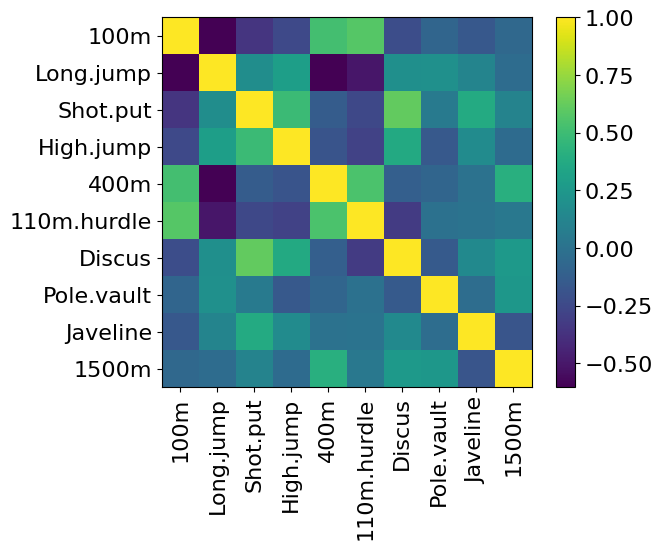

In [8]:
plt.imshow(X_scaled.corr())
plt.colorbar()
plt.xticks(ticks=range(len(X_scaled.columns)), labels=X_scaled.columns, rotation=90)
plt.yticks(ticks=range(len(X_scaled.columns)), labels=X_scaled.columns)
plt.show()

---
## Part 5 (2 points)

* From our correlation matrix, it looks like `Discus` and `Shot put` are positively correlated. Plot a scatter plot of the scaled values of these two features for all the datapoints to see this visually.

Your plot should look like this:

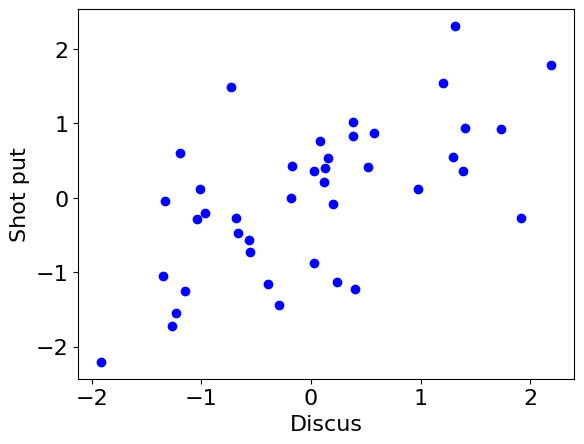

In [15]:
plt.scatter(X_scaled['Discus'],X_scaled['Shot.put'],color='b')
plt.xlabel('Discus')
plt.ylabel("Shot put")
plt.show()

---
## Part 6 (2 points)

* The first step in performing PCA is to compute the covariance matrix of our data. If our data matrix is the scaled matrix `X_scale` which is dimensions of $N$ datapoints by $P$ features, our covariance matrix is $S = X^TX$.

* To make things easier, create a numpy array called `X_scaled_np` using `.to_numpy`.

In [47]:
X_scaled_np=X_scaled.to_numpy()
# covariance_matrix = np.cov(X_scaled_np, rowvar=False)
cov_mat= X_scaled_np.T @X_scaled_np
np.shape(cov_mat)

(10, 10)

---
## Part 7 (2 points)

* Next, we want to compute the eigenvectors and eigenvalues of our covariance matrix. Use the numpy method [`np.linalg.eig`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html) to do this.

* Once we have our eigenvectors, we can compute our principal components by multiplying our data matrix with the eigenvectors. Do this, and then plot a scatter plot of the first two principal components. Additionally, use the `Points` column from our original dataframe to color the points. With two components we can see separation between higher and lower performance. This is **NOT** necessarily the case, PCA is unsupervised so it is not finding axes that relate to any outcome measure by design, just ones that explain the most variance across the features. This case happens to work really nicely!

Your plot should look like this:

Text(0, 0.5, 'PC 2')

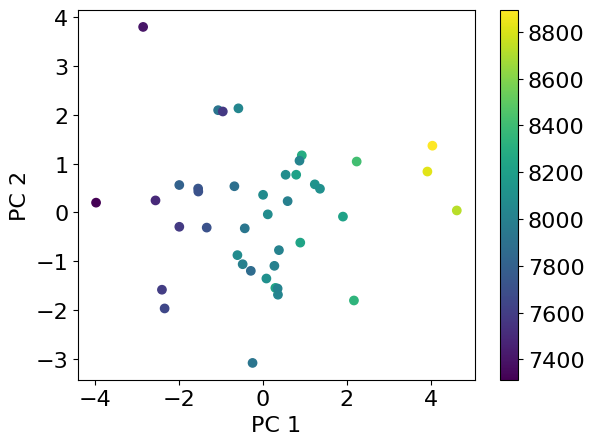

In [58]:
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)
pc =   X_scaled @ eigenvectors
np.shape(pc)
plt.scatter(pc[0], pc[1],c=df['Points'], cmap='viridis')
plt.colorbar()
plt.xlabel('PC 1')
plt.ylabel('PC 2')

---
## Part 8 (2 points)

For a given eigenvector, each element tells us how much each feature contributes to the associated principal component. We can examine these values to understand how PC1, etc. are being constructed.

* Plot the elements of the first eigenvector as points, setting the x axis to the feature names. (For getting the names of the features on the x-axis, `plt.xticks` and `.columns` will be helpful).

Your plot should look like this:

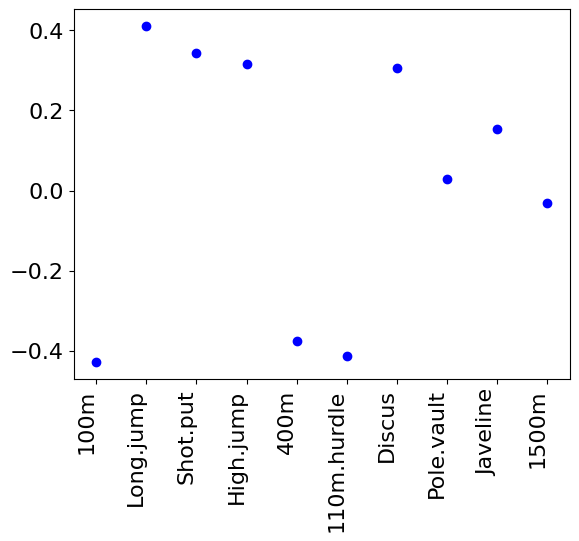

In [68]:
plt.scatter(X_scaled.columns,eigenvectors[:, 0],color='b')
plt.xticks(rotation=90, ha='right')
plt.show()

##<font color='red'>**Part 8 SHORT ANSWER (4 points):**

In words, describe which features have large values and which features have small values. How are the features with small and large values respectively similar and different? If the combination of features produces the first principal component, how might we describe the 'nature' of the first component? (Think -- if these features combine to produce it, what 'name' could we give this 'new' feature'?)</font>  

Looking at the bar plot of the first eigenvector's elements, we can observe that some features have relatively large positive values, while others have relatively large negative values. Specifically, features such as 'Long.jump', 'High.jump', 'Pole.vault', and 'Javeline' have large positive values, indicating that they contribute significantly to the first principal component. On the other hand, features like '400m', '1500m', and 'Shot.put' have large negative values, suggesting that they also contribute significantly but in the opposite direction.

Features with large positive values are similar in the sense that they are all events where a higher value implies better performance, such as longer jumps, higher jumps, or longer throws. Conversely, features with large negative values are similar in that they are events where a lower value implies better performance, such as shorter running times.

The first principal component, being a combination of these features, represents a composite measure of overall athletic performance across various events. We could describe it as a measure of 'overall athleticism' or 'general athletic ability'. This component captures the variance in performance across different types of events, indicating an athlete's overall proficiency in multiple athletic disciplines.

---
## Part 9 (2 points)

* Now that we implemented PCA ourselves, its time to take advantage of sklearn.

* Import [`PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.transform) from `sklearn.decomposition`.

* Create an instance of `PCA()` called `pca`.

* Use [`fit_transform`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.fit_transform) on the X_scaled data to perform PCA and project the data into the principal components. Woah!

* As above, plot a scatter plot of the first two principal components. It should look like our plot from above.

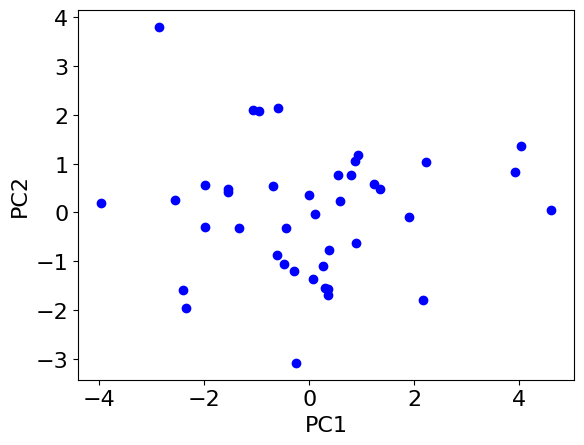

In [72]:
from sklearn.decomposition import PCA
pca =PCA()
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0],X_pca[:,1],color='b')
plt.xlabel('PC1')
plt.ylabel("PC2")
plt.show()

---
## Part 10 (2 points)

* Our fit `pca` instance contains an attribute called `components_` which contains the 'loadings' of the data onto the principal components (i.e. the eigenvectors of the covariane matrix.) Plot a scatter plot of the entries of the first loading against the name of the feature, as we did above. It should look the same.

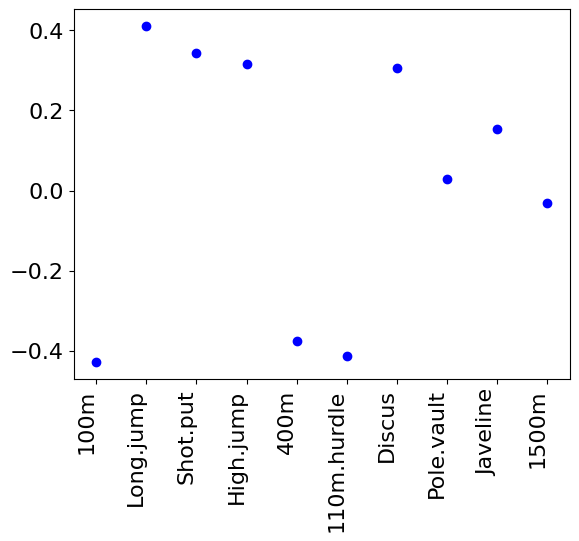

In [77]:
plt.scatter(X_scaled.columns,pca.components_[0],color='b')
plt.xticks(rotation=90, ha='right')
plt.show()

---
## Part 11 (2 points)

* The eigenvalues tell us how variance from our original data is distributed across each principal component direction. Compute the sqrt of the eigenvalues from the eigenvalue decomposition we did by hand against the attribute of our `pca` instance called `singular_values_`, which is the singular values of our data matrix. Although we are not going to cover signular value decomposition, as a reminder from linear algebra, the eigenvalues are the singular values squared.

Notice that the order is not quite the same. This isn't important -- the two methods simply order things differently.

In [80]:
np.sqrt(eigenvalues)
pca.singular_values_

array([11.58223325,  8.4393348 ,  7.58957074,  6.58261836,  5.29865218,
        4.9568151 ,  4.30123771,  4.03384928,  2.96772792,  2.7333728 ])

---
## Part 12 (2 points)

The ratio of the cumulative sum of our eigenvalues to its total sum will tell us how much variance in our dataset our successive principal components represent. Plot this as a scatter plot two ways:

* Using our computed eigenvalues
* Using the `explained_variance_ratio_` attribute of our `pca` instance.

Your plot should look like this:

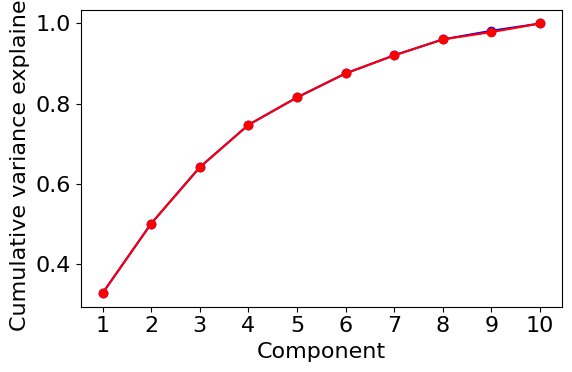

In [ ]:
plt.scatter()

##<font color='red'>**Part 12 SHORT ANSWER (4 points):**

Given the distribution of variance we are seeing here, what does that tell you about how one should train for a decathalon? Should I train for each event seperately? What if instead I trained in such a way to build up a specific set of skills? Does there seem to be much benefit, according to the picture from PCA, of building up the skill along the last PC?</font>  

---
## Part 13 (6 points)
* We're going to show that PCA can be thought of as an iterative process of finding the axis that maximizes variation, then removing this axis and finding the next axis of maximum variation in the reduced data.
* Start by removing the variance in our data accounted for by PC1 from the data covariance matrix and call this new 'reduced' covariance matrix `XCOV_minus1`
* Then show that the first eigenvector of this reduced data covariance matrix is equal to the SECOND eigenvector of our full data covariance matrix.